**Joyce Ann Murillo**

**C0927648**

**Assignment**: **Predicting Used Car Prices Using Multiple Regression Models**

**Objective:**

You are given a dataset of used car listings. Your task is to build multiple regression models to predict the selling price of used cars based on features like age, brand, kilometers driven, fuel type, etc. Compare the models based on performance, and save the best model for future deployment.


**Dataset source** : https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset


# **Data Auditing**

Audit the dataset to identify inconsistencies, missing values, and potential data quality issues

In [1432]:
import pandas as pd

# Loading the dataset into a pandas dataframe

df = pd.read_csv('/content/used_cars.csv')

In [1433]:
print(df.head())

      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic        

Data Description :

**Brand & Model:** Name of the manufacturer and specific model of the vehicle.

**Model Year**: Year the vehicle was manufactured; useful for gauging age and tech level.

**Mileage**: Distance the vehicle has traveled; indicates usage and potential wear.

**Fuel Type**: Type of fuel used (e.g., gasoline, diesel, electric, hybrid).

**Engine Type**: Details about engine specifications affecting performance and efficiency.

**Transmission**: Type of gear system (e.g., automatic, manual).

**Exterior & Interior Colors**: Vehicle color schemes, reflecting design/aesthetic preferences.

**Accident History**: Records of any past accidents or damage.

**Clean Title**: Indicates whether the vehicle has a clear legal title (no liens or salvage).

**Price**: Listed selling price; helps assess affordability and compare across listings

In [1434]:
# Display the number of rows and columns in the DataFrame

print("Shape:", df.shape)

Shape: (4009, 12)


In [1435]:
# Display the column names of the DataFrame

print("Columns:", df.columns)

Columns: Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


In [1436]:
# Display the summary of the DataFrame including column types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [1437]:
# Display the count of missing values per column, sorted in descending order

df.isnull().sum().sort_values(ascending=False)

,0
clean_title,596
fuel_type,170
accident,113
brand,0
milage,0
model_year,0
model,0
engine,0
ext_col,0
transmission,0


In [1438]:
# Check Uniqueness (Cardinality) to analyze the number of distinct values in a categorical feature of the dataset.
# sorted in descending order

df.nunique().sort_values(ascending=False)

,0
milage,2818
model,1898
price,1569
engine,1146
ext_col,319
int_col,156
transmission,62
brand,57
model_year,34
fuel_type,7


In [1439]:
# Display descriptive statistics for all columns and transpose the result for readability
# This is to  quickly summarize and understand the data’s structure, types, and distribution

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,4009,57,Ford,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,4009,1898,M3 Base,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_year,4009.0,NaN,NaN,NaN,2015.51559,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0
milage,4009,2818,"110,000 mi.",16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,3839,7,Gasoline,3309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,4009,1146,2.0L I4 16V GDI DOHC Turbo,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,4009,62,A/T,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ext_col,4009,319,Black,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_col,4009,156,Black,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accident,3896,2,None reported,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1440]:
# Count and display the number of duplicate rows in the DataFrame
# Detect redundant data that might skew analysis or modeling.

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [1441]:
# Display the total number of missing values in each column
# To check for any remaining missing values after cleaning, ensuring data completeness before analysis or modeling.

df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


## Further checking of NULL Values

Further auditing of columns with null values revealed that the fuel_type column contains entries like "- (45)", "(2)", and "not supported"—which appear to be invalid or non-informative placeholders. Additionally, there are 170 missing values.

Since these noisy or missing entries represent more than 5% of the dataset, I chose to group and replace them with a new category, "UNKNOWN", rather than imputing them with "Gasoline" (the most frequent value). This avoids introducing bias and preserves the integrity of the feature distribution.

In [1442]:
print("Fuel Type Value Counts (with NaNs):")
print(df['fuel_type'].value_counts(dropna=False))

Fuel Type Value Counts (with NaNs):
fuel_type
Gasoline          3309
Hybrid             194
NaN                170
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64


Below output for accident shows that 2.8% are missing entries. I will impute this with UNKNOWN instead of no accident to avoid false assumptions

In [1443]:
print("\nAccident History Value Counts (with NaNs):")
print(df['accident'].value_counts(dropna=False))



Accident History Value Counts (with NaNs):
accident
None reported                             2910
At least 1 accident or damage reported     986
NaN                                        113
Name: count, dtype: int64


Below values for clean_title column shows no contrast, meaning either YES or NaN (15%). There is a huge missing rate for this column. I decided to drop this in the cleaning process.

In [1444]:
print("\nClean Title Value Counts (with NaNs):")
print(df['clean_title'].value_counts(dropna=False))



Clean Title Value Counts (with NaNs):
clean_title
Yes    3413
NaN     596
Name: count, dtype: int64


Based on the earlier data type summary, only model_year is currently of integer type. I will need to convert other columns—such as mileage and price—to int where appropriate to ensure consistent and correct data types for analysis.

Columns to convert to numeric:

price

milage

engine


In [1445]:
# Inspect formatting consistency of object-type columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].astype(str).str.strip().str.lower().value_counts())



Column: brand
brand
ford             386
bmw              375
mercedes-benz    315
chevrolet        292
porsche          201
audi             200
toyota           199
lexus            163
jeep             143
land             130
nissan           116
cadillac         107
gmc               91
ram               91
dodge             90
tesla             87
kia               76
hyundai           72
subaru            64
acura             64
mazda             64
honda             63
infiniti          59
volkswagen        59
lincoln           52
jaguar            47
volvo             38
maserati          34
bentley           33
mini              33
buick             30
chrysler          28
lamborghini       26
genesis           20
mitsubishi        20
alfa              19
rivian            17
hummer            16
pontiac           15
ferrari           12
rolls-royce       11
aston              9
scion              6
mclaren            6
saturn             5
fiat               5
lotus        

Observed:

brand : clean
- all lowercase and stripped

model : mixed cleanliness
- contains empty strings("") or whitespacces only entries
- many unique entries
- no fomratting issues

fuel_type : dirty
-contains "-", "not supported" and NaN
- will be grouped later

transmission :  format inconsistency
- such as 6-speed vs 6 speed
- plan to normalize later

ext_col / int_col : a bit dirty
-lowercase
- inconsistent formatting like black/gray , very light cashmere
- too granular

clean_title : clean (as mentioned earlier)
-single category  - yes or NaN


# **Data Cleaning**

## Convert price, milage, and engine to numeric types

In [1446]:
import numpy as np
import pandas as pd
import re

# Convert price: remove $ and commas, then to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Convert milage: extract numeric digits from strings like "120,000 km"
df['milage'] = df['milage'].str.replace(',', '').str.extract('(\d+)')
df['milage'] = pd.to_numeric(df['milage'], errors='coerce')

# Convert engine: extract numeric part (handles "2.0L", "2000cc", etc.)
df['engine'] = df['engine'].str.extract(r'(\d+\.?\d*)')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')


In [1447]:
print("Converted values:")
print(df[['price', 'milage', 'engine']].head())

Converted values:
   price  milage  engine
0  10300   51000   300.0
1  38005   34742     3.8
2  54598   22372     3.5
3  15500   88900   354.0
4  34999    9835     2.0


In [1448]:
# Check how many missing values after conversion:
print("\nMissing values after conversion:")
print(df[['price', 'milage', 'engine']].isnull().sum())



Missing values after conversion:
price      0
milage     0
engine    78
dtype: int64


Since the 'engine' column has 78 missing values, I will impute them using the mean. This is appropriate given that we're using regression models, which benefit from preserving the numeric distribution.


In [1449]:
df['engine'] = df['engine'].fillna(df['engine'].mean())
print("Missing values in 'engine' after mean imputation:", df['engine'].isnull().sum())

Missing values in 'engine' after mean imputation: 0


## Fix categorical formatting

In [1450]:
# Apply lowercase and strip whitespace to all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()


In [1451]:
# Preview cleaned values
for col in ['fuel_type', 'transmission', 'ext_col', 'int_col']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))



Column: fuel_type
fuel_type
gasoline          3309
hybrid             194
nan                170
e85 flex fuel      139
diesel             116
–                   45
plug-in hybrid      34
not supported        2
Name: count, dtype: int64

Column: transmission
transmission
a/t                               1037
8-speed a/t                        407
transmission w/dual shift mode     398
6-speed a/t                        362
6-speed m/t                        248
automatic                          237
7-speed a/t                        209
8-speed automatic                  176
10-speed a/t                       119
5-speed a/t                         86
Name: count, dtype: int64

Column: ext_col
ext_col
black     908
white     816
gray      496
silver    374
blue      350
red       261
green      74
brown      43
gold       42
beige      38
Name: count, dtype: int64

Column: int_col
int_col
black        2029
beige         539
gray          472
brown         157
–             133
whit

## Handle Missing Values

Earlier in the Data Auditing, 3 columns were found to have missing values  - fuel_type,accident, clean_title. In this setion, we will be handling those missing values

In [1452]:
df['fuel_type'] = df['fuel_type'].replace({
    '–': 'unknown',
    'not supported': 'unknown',
    'nan': 'unknown'
})

In [1453]:
# Fill the missing values with UNKNOWN
df['accident'] = df['accident'].fillna('unknown')

In [1454]:
# Drop clean_title
df.drop(columns=['clean_title'], inplace=True)

In [1455]:
# Show the output after Filing the missing values
print("Fuel Type:\n", df['fuel_type'].value_counts(dropna=False))
print("\nAccident:\n", df['accident'].value_counts(dropna=False))
print("\nColumns after dropping 'clean_title':", df.columns)


Fuel Type:
 fuel_type
gasoline          3309
unknown            217
hybrid             194
e85 flex fuel      139
diesel             116
plug-in hybrid      34
Name: count, dtype: int64

Accident:
 accident
none reported                             2910
at least 1 accident or damage reported     986
nan                                        113
Name: count, dtype: int64

Columns after dropping 'clean_title': Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'price'],
      dtype='object')


# **Exploratory Data Analysis**

## **Price Distribution (Target Variable)**
I started with price EDA since this is my target variable

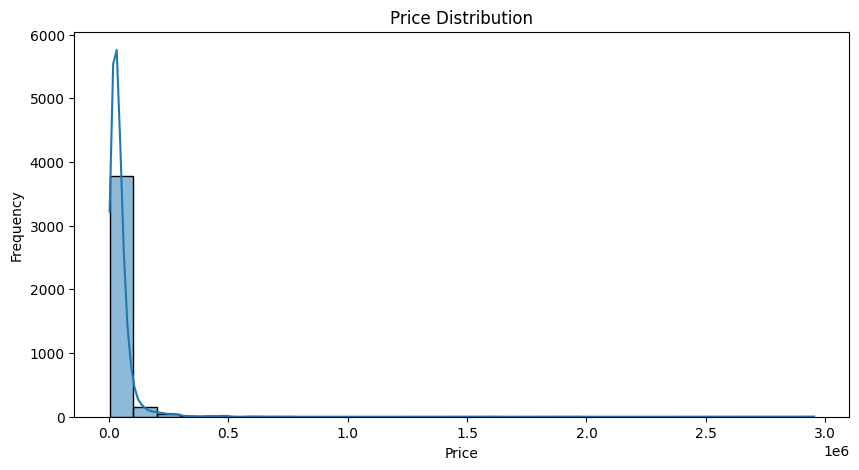

In [1456]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**
Heavily right-skewed (long tail to the right)

Majority of prices are clustered between $0-$100,000

A few extreme outliers go up to $3 million

**Note**:

Need to normalize the target


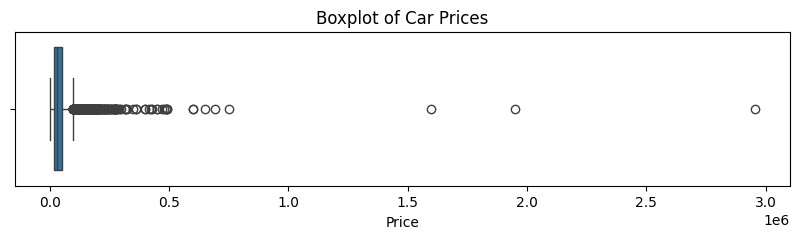

In [1457]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()


**Interpretation:**

There are many extreme outliers, especially past $150,000–$200,000

The bulk of the data is tightly packed in the $0–$60,000 range

Outliers could be luxury/exotic cars

**Note**:

Log transform — neutralizes extreme ranges.

Drop outliers — based on an upper quantile (e.g., 99th percentile).

In [1458]:
# Shows the number of cars priced for more than 150k
luxury_cars = df[df['price'] >= 150000]
print("Number of cars priced above $150,000:", len(luxury_cars))

Number of cars priced above $150,000: 120


The above output shows that there are 120 (out of 4009 entries )over 150,000 price point which looks like luxury car brands.

Note: Will neutralize the extreme values later in the feature engineering


## **Scatterplot: Mileage vs Price**


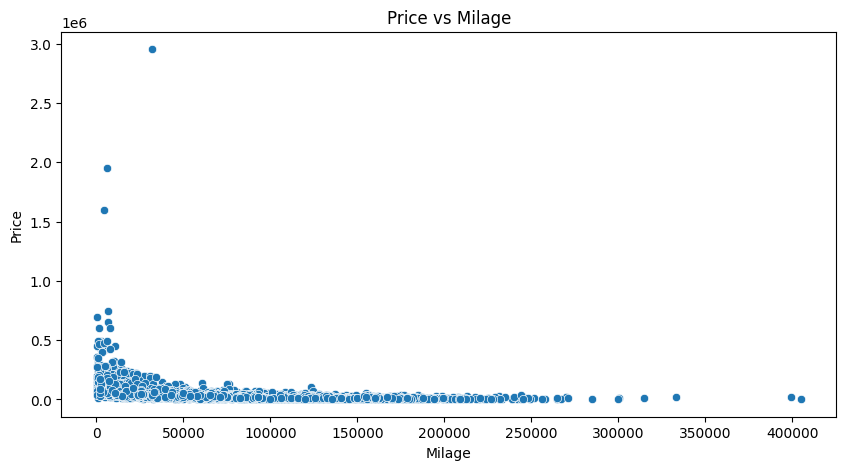

In [1459]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='milage', y='price')
plt.title('Price vs Milage')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.show()


**Interpretation**:

Inverse relationship - price drops as mileage increase
Mileage outliers - Some vehicles have mileage above 300,000 km.
High-priced low-mileage outliers - A few vehicles with very low mileage but unusually high prices (above $1M). Likely rare luxury/sports cars.

## **Scatter Plot : Engine vs Price**

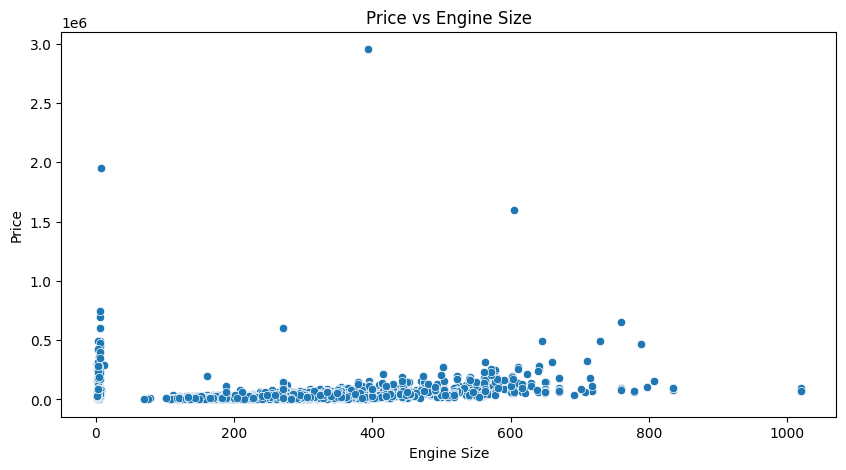

In [1460]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='engine', y='price')
plt.title('Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


**Interpretation**:

 The above relationship does not show clear positive trend. Likely because of the inconsistency of the dataset.

 Note: Please check feature engineering

## **Bar Plot : Average Price by fuel_type**

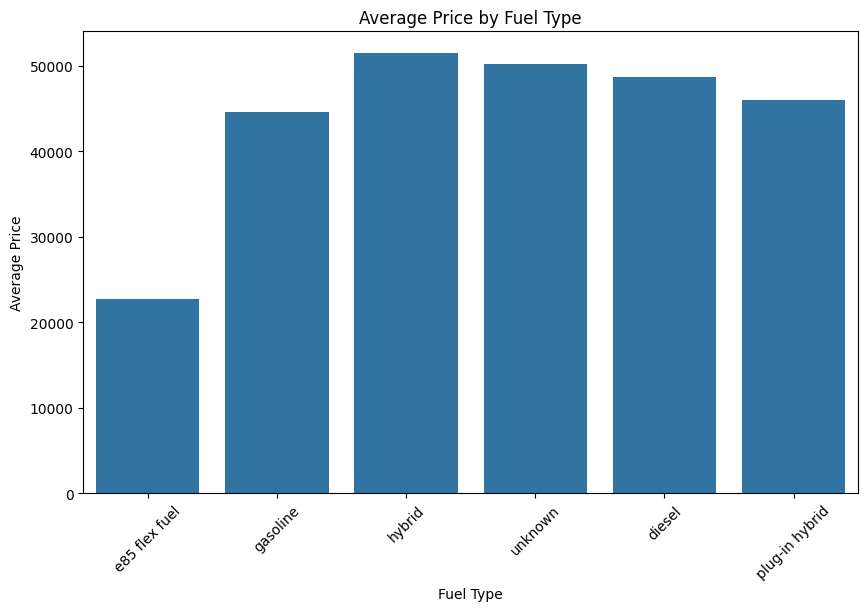

In [1461]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='fuel_type', y='price', estimator=np.mean, errorbar=None)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


**Interpretation**:

Hybrid vehicles show the highest average price - likely due to newer models and tech appeal.

E85 Flex Fuel is the lowest - possibly older or less market-demanded models.

Gasoline, Diesel, and Plug-In Hybrid hover in a middle-high band.

Unknown has a high average — this is likely noise caused by:

Missing/uncategorized values being present in newer or high-end listings.

Small sample size inflating average

*Fuel type influences price — especially gasoline vs hybrid*

In [1462]:
df['fuel_type'].value_counts()


,count
fuel_type,
gasoline,3309
unknown,217
hybrid,194
e85 flex fuel,139
diesel,116
plug-in hybrid,34


## **Transmission Type vs Price**

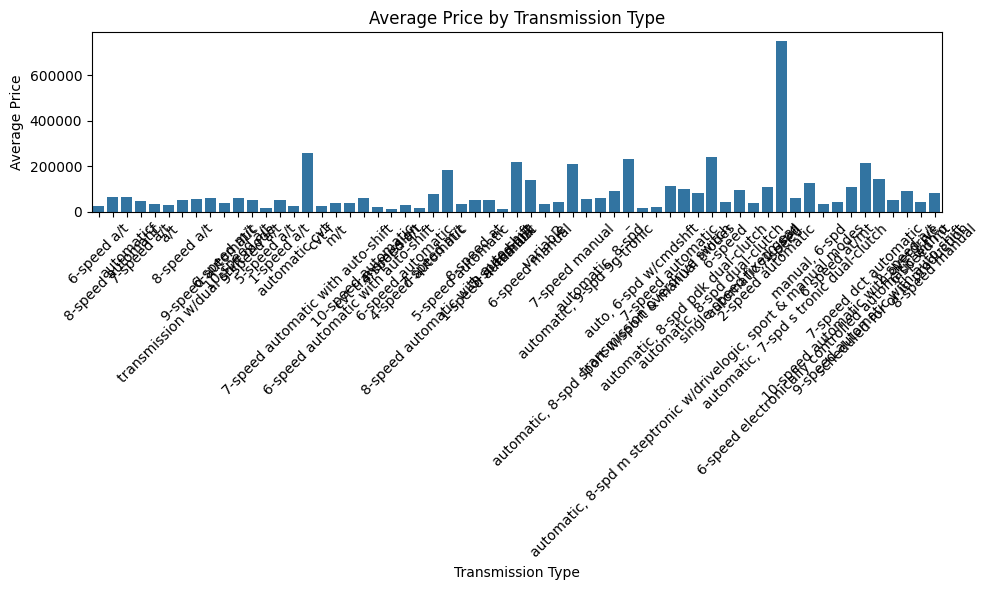

In [1463]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='transmission', y='price', estimator='mean', errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Price by Transmission Type")
plt.ylabel("Average Price")
plt.xlabel("Transmission Type")
plt.tight_layout()
plt.show()


In [1464]:
print(df['transmission'].value_counts(dropna=False))


transmission
a/t                                  1037
8-speed a/t                           407
transmission w/dual shift mode        398
6-speed a/t                           362
6-speed m/t                           248
                                     ... 
10-speed automatic with overdrive       1
9-speed automatic with auto-shift       1
scheduled for or in production          1
6 speed mt                              1
8-speed manual                          1
Name: count, Length: 61, dtype: int64


**Interpretation**:

The above plot shows 61 unique types of transmission type which shows hight cardinality, may cause overitting

Note: Will group into categories later in feature engineering. Will need to do research  about transmission types

## Explore Exterior Color (ext_col) vs Price

In [1465]:
print(df['ext_col'].value_counts(dropna=False))


ext_col
black                      908
white                      816
gray                       496
silver                     374
blue                       350
                          ... 
emin white                   1
nightfall gray metallic      1
lunar rock                   1
quartzite grey metallic      1
c / c                        1
Name: count, Length: 317, dtype: int64


Exterior Color has 317 unique values.

**Note** that we did not group the top 10 transmission types earlier, as each transmission category holds mechanical significance and can directly impact vehicle performance, driving experience, and price. In contrast, features like color are largely aesthetic and do not materially influence a car’s market value, making them more suitable for grouping or simplification.


<Axes: title={'center': 'Top 10 Exterior Colors'}, ylabel='ext_col'>

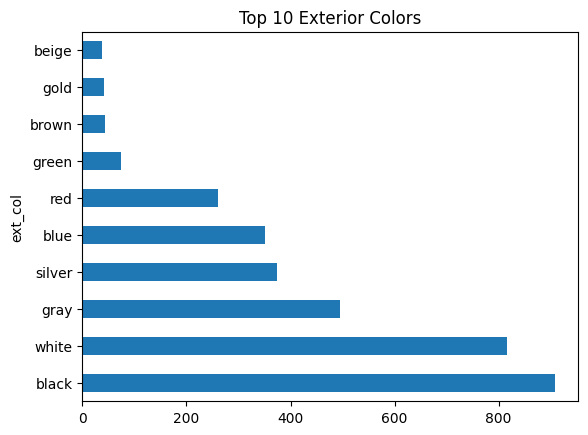

In [1466]:
top_colors = df['ext_col'].value_counts().nlargest(10)
top_colors.plot(kind='barh', title='Top 10 Exterior Colors')


## Top 10 Frequent Exterior Colors by Avg Price

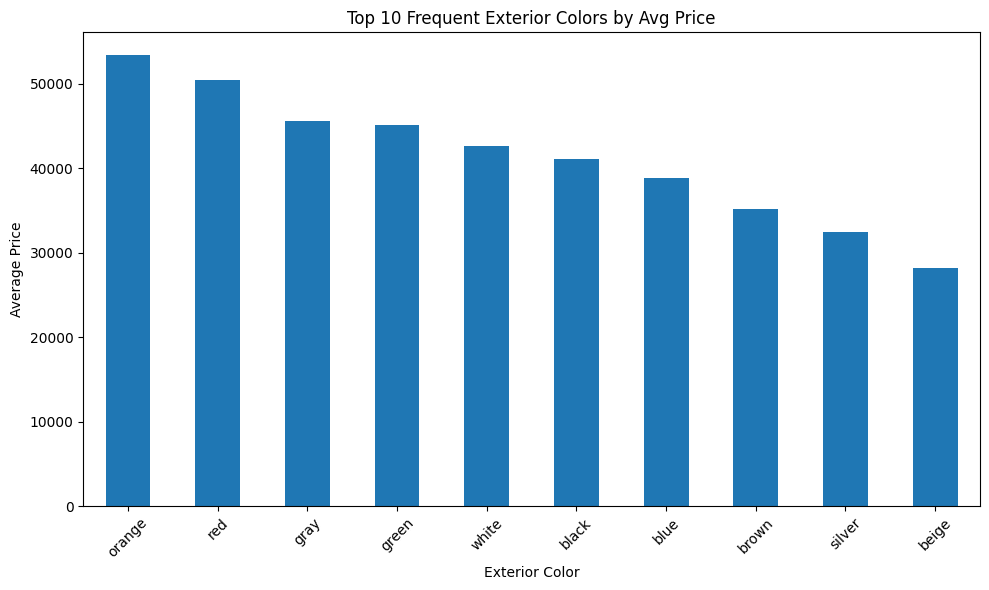

In [1467]:
# Filter out rare colors to avoid misleading averages
common_colors = df['ext_col'].value_counts()
valid_colors = common_colors[common_colors > 30].index
filtered_df = df[df['ext_col'].isin(valid_colors)]

# Replot average price from frequent colors only
avg_price_by_ext_color = filtered_df.groupby('ext_col')['price'].mean().sort_values(ascending=False)
avg_price_by_ext_color.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Frequent Exterior Colors by Avg Price')
plt.ylabel('Average Price')
plt.xlabel('Exterior Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretation**:

Orange and red cars, despite not being the most common, fetch higher prices.

White, black, gray : popular neutral tones — still hold strong average value.

Silver and beige appear less valued, possibly due to higher supply or less perceived appeal.



## Explore int_col Distribution

In [1468]:
print(df['int_col'].value_counts(dropna=False))


int_col
black                   2029
beige                    539
gray                     472
brown                    157
–                        133
                        ... 
gray w/blue bolsters       1
very light cashmere        1
black / gray               1
deep chestnut              1
black / graphite           1
Name: count, Length: 152, dtype: int64


/tmp/ipython-input-1469-2544645725.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_int_colors.values, y=top_int_colors.index, palette='viridis')


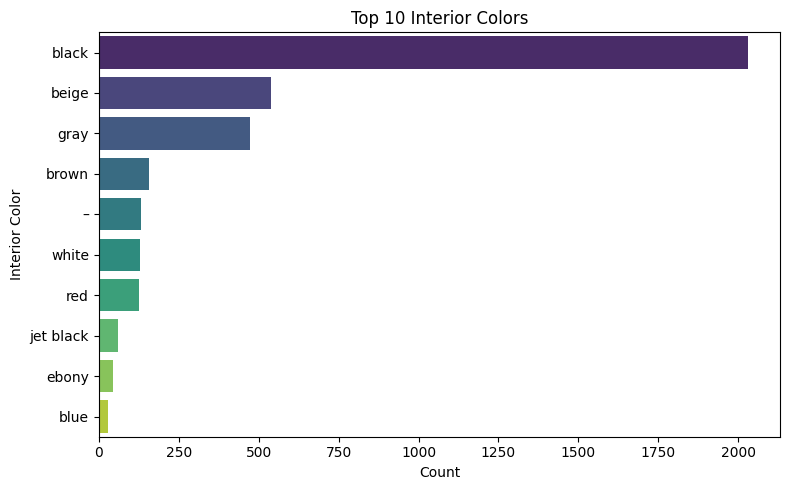

In [1469]:
# Top 10 most frequent interior colors
top_int_colors = df['int_col'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(x=top_int_colors.values, y=top_int_colors.index, palette='viridis')
plt.title("Top 10 Interior Colors")
plt.xlabel("Count")
plt.ylabel("Interior Color")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1470-17676015.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_int.index, y=avg_price_by_int.values, palette='magma')


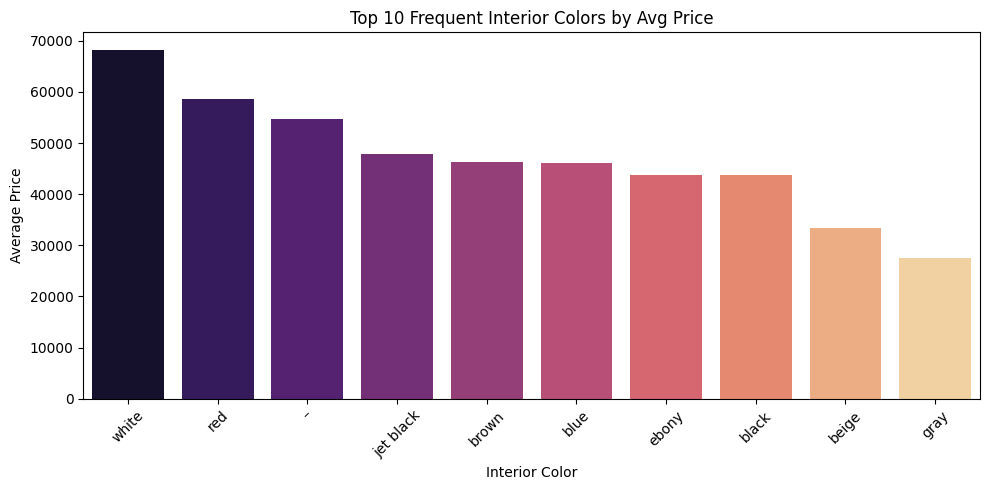

In [1470]:
# Get top 10 frequent interior colors
top_int_colors = df['int_col'].value_counts().head(10).index

# Compute average price for each
avg_price_by_int = df[df['int_col'].isin(top_int_colors)].groupby('int_col')['price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_by_int.index, y=avg_price_by_int.values, palette='magma')
plt.title("Top 10 Frequent Interior Colors by Avg Price")
plt.xlabel("Interior Color")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The above shows values in int_color such as - and -- . I will do a clean up and mapping of colors.

In [1471]:
# Print all unique interior colors (sorted alphabetically for easy inspection):
print(sorted(df['int_col'].unique()))


['adrenaline red', 'agave green', 'almond beige', 'amber', 'amg black', 'anthracite', 'aragon brown', 'ash', 'beige', 'beluga', 'beluga hide', 'bianco polar', 'black', 'black / brown', 'black / express red', 'black / graphite', 'black / gray', 'black / saddle', 'black / stone grey', 'black onyx', 'black w/red stitching', 'black/graphite', 'black/gun metal', 'black/red', 'black/saddle brown', 'blk', 'blue', 'boulder', 'brandy', 'brown', 'camel', 'camel leather', 'canberra beige', 'canberra beige/black', 'cappuccino', 'caramel', 'carbon black', 'ceramic', 'charcoal', 'charcoal black', 'charles blue', 'chateau', 'chestnut', 'classic red', 'cloud', 'cobalt blue', 'cocoa / dune', 'dark ash', 'dark auburn', 'dark galvanized', 'dark gray', 'deep chestnut', 'deep cypress', 'deep garnet', 'diesel gray / black', 'ebony', 'ebony / ebony accents', 'ebony / pimento', 'ebony black', 'ebony.', 'ebony/light oyster stitch', 'espresso', 'giallo taurus / nero ade', 'gideon', 'global black', 'gold', 'grac

In [1472]:
# Step 1: Clean and Map
df['int_col'] = df['int_col'].str.lower().str.strip()

int_col_mapping = {
    'blk': 'black', 'black/graphite': 'black', 'black onyx': 'black',
    'black w/red stitching': 'black-red', 'black/red': 'black-red',
    'black / red': 'black-red', 'black / graphite': 'black', 'black / gray': 'black-gray',
    'black / saddle': 'black-brown', 'black / brown': 'black-brown',
    'black / stone grey': 'black-gray', 'black/gun metal': 'black-gray',
    'diesel gray / black': 'black-gray',

    'charcoal': 'gray', 'dark gray': 'gray', 'graphite': 'gray', 'light gray': 'gray',
    'medium ash gray': 'gray', 'medium dark slate': 'gray', 'rock gray': 'gray',
    'graystone': 'gray', 'graphite w/gun metal': 'gray', 'gray w/blue bolsters': 'gray',

    'camel': 'beige', 'camel leather': 'beige', 'tan': 'beige', 'canberra beige': 'beige',
    'very light cashmere': 'beige', 'parchment': 'beige', 'parchment.': 'beige',
    'saiga beige': 'beige', 'shara beige': 'beige', 'pearl beige': 'beige',
    'sand beige': 'beige', 'beige/black': 'beige-black', 'silk beige/black': 'beige-black',

    'red/black': 'red-black', 'red / black': 'red-black', 'rioja red': 'red', 'classic red': 'red',
    'magma red': 'red', 'hotspur': 'red', 'hotspur hide': 'red', 'adrenaline red': 'red',

    'espresso': 'brown', 'saddle brown': 'brown', 'nougat brown': 'brown',
    'roast': 'brown', 'brown / black': 'brown-black', 'deep chestnut': 'brown',
    'sarder brown': 'brown', 'aragon brown': 'brown', 'chestnut': 'brown',

    'ivory / ebony': 'white-black', 'white / brown': 'white-brown',
    'grace white': 'white', 'macchiato': 'white', 'whisper beige': 'white',

    'rhapsody blue': 'blue', 'charles blue': 'blue', 'cobalt blue': 'blue',

    'sakhir orange': 'orange', 'sakhir orange/black': 'orange-black', 'kyalami orange': 'orange',

    'ebony.': 'ebony', 'ebony black': 'ebony',

    '–': 'unknown', '': 'unknown', ' ': 'unknown'
}

df['int_col'] = df['int_col'].replace(int_col_mapping)

# Step 2: Group rare colors as 'other'
top_20 = df['int_col'].value_counts().nlargest(20).index
df['int_col'] = df['int_col'].apply(lambda x: x if x in top_20 else 'other')

# Step 3: Print frequency
print(df['int_col'].value_counts())


int_col
black                  2039
beige                   562
gray                    502
brown                   167
red                     136
unknown                 133
white                   132
other                    98
jet black                59
ebony                    47
blue                     32
orange                   23
silver                   16
global black             13
black-gray               10
nero ade                 10
gold                     10
green                     7
charcoal black            5
black / express red       4
satin black               4
Name: count, dtype: int64


**Note** that this part of cleaning was not done for ext_col even though it has more unique values. Interior car colors have a more personalized color anmes such as cashmere, nero ade, macchiato and combinations suchs as tan/ebony, black/brown.

/tmp/ipython-input-1473-3602402102.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_int.index, y=avg_price_by_int.values, palette='magma')


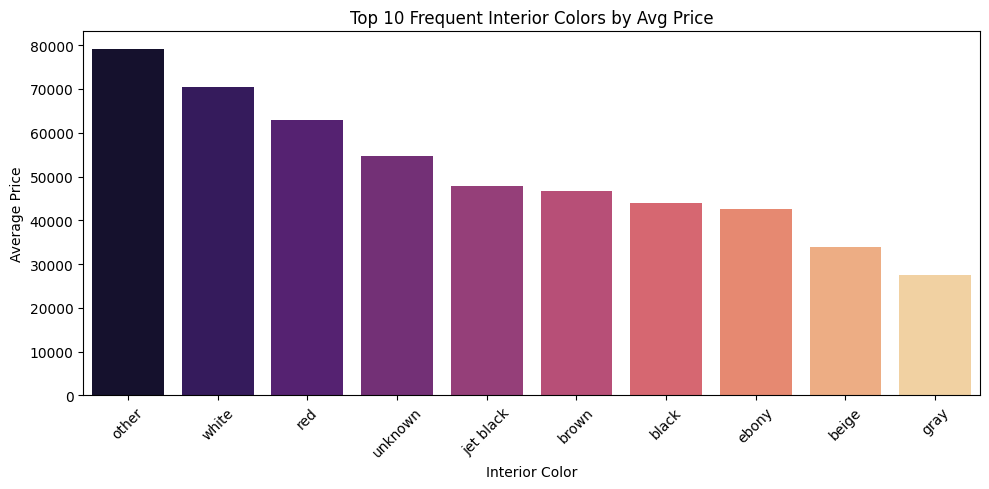

In [1473]:
# Get top 10 frequent interior colors after Cleaning and Mapping
top_int_colors = df['int_col'].value_counts().head(10).index

# Compute average price for each
avg_price_by_int = df[df['int_col'].isin(top_int_colors)].groupby('int_col')['price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_by_int.index, y=avg_price_by_int.values, palette='magma')
plt.title("Top 10 Frequent Interior Colors by Avg Price")
plt.xlabel("Interior Color")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Analyze, Clean and Plot the brand column**

In [1474]:
print(df['brand'].value_counts(dropna=False))


brand
ford             386
bmw              375
mercedes-benz    315
chevrolet        292
porsche          201
audi             200
toyota           199
lexus            163
jeep             143
land             130
nissan           116
cadillac         107
gmc               91
ram               91
dodge             90
tesla             87
kia               76
hyundai           72
subaru            64
acura             64
mazda             64
honda             63
infiniti          59
volkswagen        59
lincoln           52
jaguar            47
volvo             38
maserati          34
bentley           33
mini              33
buick             30
chrysler          28
lamborghini       26
genesis           20
mitsubishi        20
alfa              19
rivian            17
hummer            16
pontiac           15
ferrari           12
rolls-royce       11
aston              9
scion              6
mclaren            6
saturn             5
fiat               5
lotus              4
lucid  

In [1475]:
brand_corrections = {
    'land': 'land rover',
    'aston': 'aston martin',
    'alfa': 'alfa romeo'
}
df['brand'] = df['brand'].replace(brand_corrections)


In [1476]:
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 30].index
df['brand'] = df['brand'].apply(lambda x: 'other' if x in rare_brands else x)


In [1477]:
print(df['brand'].value_counts())


brand
ford             386
bmw              375
mercedes-benz    315
chevrolet        292
other            235
porsche          201
audi             200
toyota           199
lexus            163
jeep             143
land rover       130
nissan           116
cadillac         107
gmc               91
ram               91
dodge             90
tesla             87
kia               76
hyundai           72
acura             64
mazda             64
subaru            64
honda             63
infiniti          59
volkswagen        59
lincoln           52
jaguar            47
volvo             38
maserati          34
bentley           33
mini              33
buick             30
Name: count, dtype: int64


## **Top Brands by Frequency**


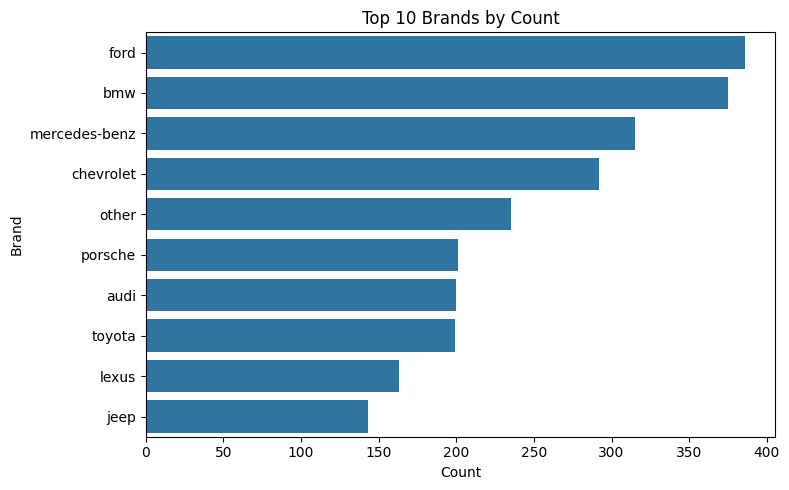

In [1478]:
import matplotlib.pyplot as plt
import seaborn as sns

top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 10 Brands by Count')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


## Top Brands by Average Price


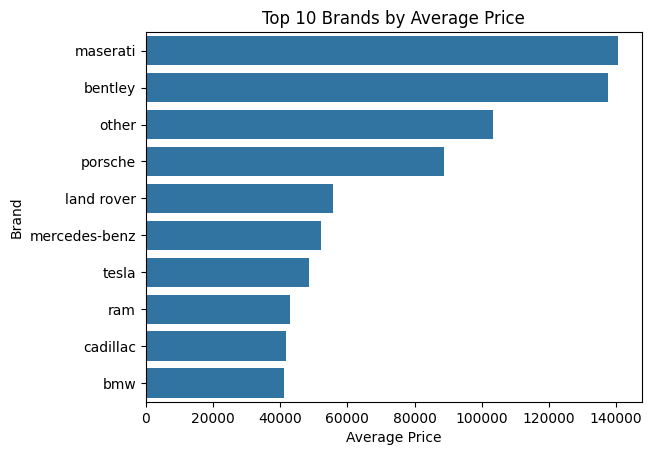

In [1479]:
avg_price = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.title('Top 10 Brands by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()


## **Analyze and Plot Model Year**


In [1480]:
print(df['model_year'].dtype)


int64


In [1481]:
df['car_age'] = 2025 - df['model_year']


In [1482]:
print(df[['model_year', 'car_age']].head())


   model_year  car_age
0        2013       12
1        2021        4
2        2022        3
3        2015       10
4        2021        4


In [1483]:
print(df['car_age'].describe())


count    4009.000000
mean        9.484410
std         6.104816
min         1.000000
25%         5.000000
50%         8.000000
75%        13.000000
max        51.000000
Name: car_age, dtype: float64


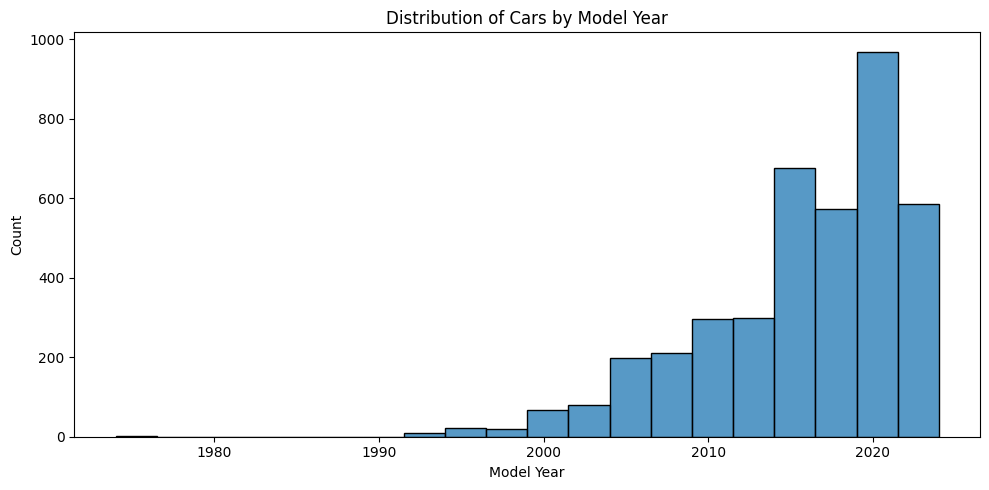

In [1484]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['model_year'].dropna(), bins=20, kde=False)
plt.title('Distribution of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Interpretation**:

A sharp increase in car listings after 2010.

Most listings are 2015–2023.

Very few cars are from pre-2000, indicating outliers or collectibles.



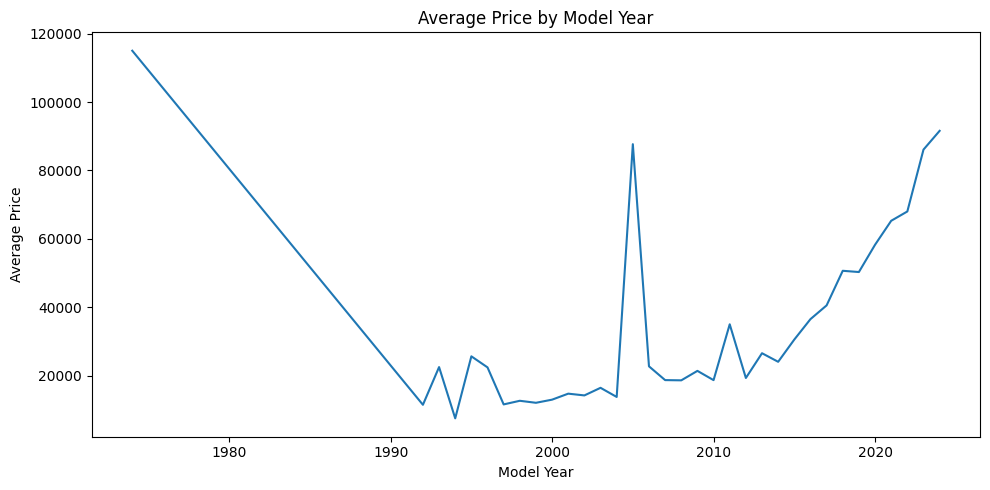

In [1485]:
avg_price_by_year = df.groupby('model_year')['price'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


**Interpretation**:

Old model years (1970 - 1990s) show weird spikes in price — likely rare collectible/luxury cars or data anomalies.

Post-2010: Price increases consistently, as expected.

Drop around 2005 - 2010

## Filter Out Outliers For Model Year

In [1486]:
# Filter model_year and price outliers
df_clean = df[(df['model_year'] >= 2000) & (df['model_year'] <= 2024)]

# Optional: Filter extreme price outliers
price_cap = df_clean['price'].quantile(0.99)
df_clean = df_clean[df_clean['price'] <= price_cap]

# Print model year distribution
print("Model Year Counts After Cleaning:")
print(df_clean['model_year'].value_counts().sort_index())

# Print price range after filtering
print("\nPrice Range After Cleaning:")
print(f"Min Price: {df_clean['price'].min()}")
print(f"Max Price: {df_clean['price'].max()}")


Model Year Counts After Cleaning:
model_year
2000     17
2001     34
2002     32
2003     49
2004     60
2005     69
2006     66
2007     98
2008    113
2009     72
2010    100
2011    123
2012    141
2013    157
2014    181
2015    228
2016    266
2017    257
2018    312
2019    294
2020    318
2021    342
2022    347
2023    220
2024      6
Name: count, dtype: int64

Price Range After Cleaning:
Min Price: 2000
Max Price: 272950


## Re Plot After Handling Outliers

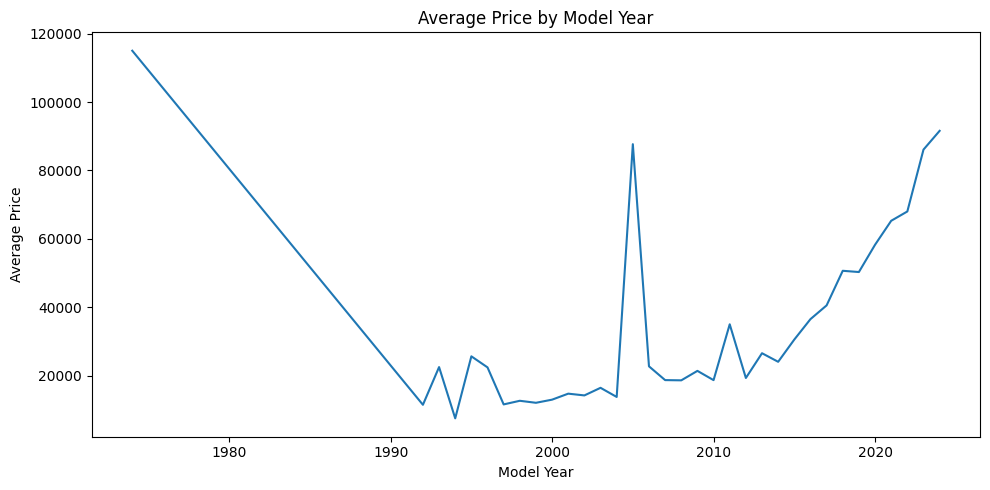

In [1487]:
avg_price_by_year = df.groupby('model_year')['price'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


 ## **Explore & Clean accident_history**

In [1488]:
print(df_clean['accident'].value_counts(dropna=False))

accident
none reported                             2826
at least 1 accident or damage reported     966
nan                                        110
Name: count, dtype: int64


In [1489]:
# Fill missing values in accident with "unknown"

df['accident'] = df['accident'].fillna('unknown')


In [1490]:
print(df['accident'].value_counts())


accident
none reported                             2910
at least 1 accident or damage reported     986
nan                                        113
Name: count, dtype: int64


In [1491]:
# The above fillna was not applied properly. There may be a mismatch due to whitespace or hidden characters

df['accident'] = df['accident'].astype(str).str.strip().str.lower()
df['accident'] = df['accident'].replace('nan', 'unknown')
print(df['accident'].value_counts())


accident
none reported                             2910
at least 1 accident or damage reported     986
unknown                                    113
Name: count, dtype: int64


## Plot distribution of accident history


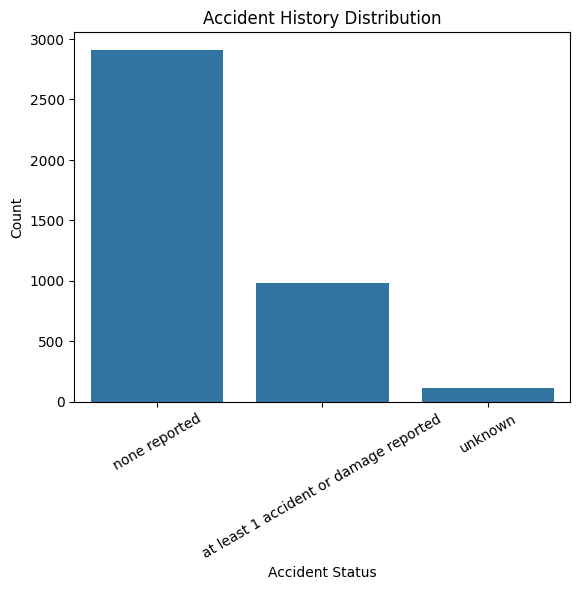

In [1492]:
sns.countplot(data=df, x='accident', order=df['accident'].value_counts().index)
plt.title('Accident History Distribution')
plt.xlabel('Accident Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


## Compare Average Price by Accident Status

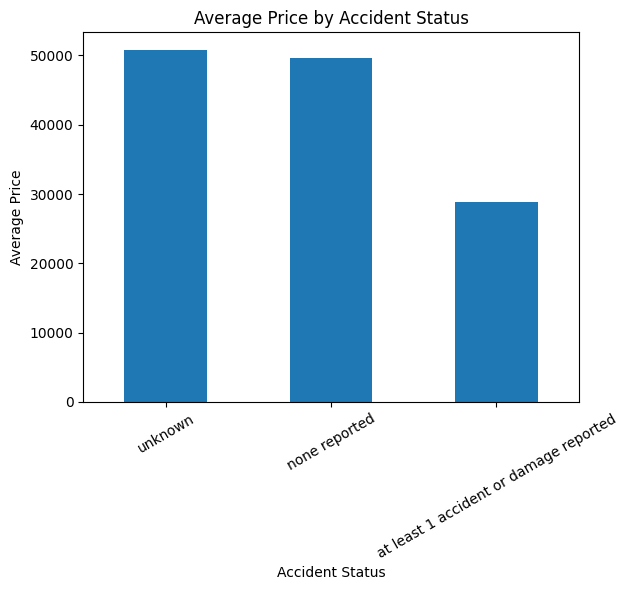

In [1493]:

avg_price_by_accident = df.groupby('accident')['price'].mean().sort_values(ascending=False)

avg_price_by_accident.plot(kind='bar', title='Average Price by Accident Status')
plt.ylabel('Average Price')
plt.xlabel('Accident Status')
plt.xticks(rotation=30)
plt.show()


# Models vs Price

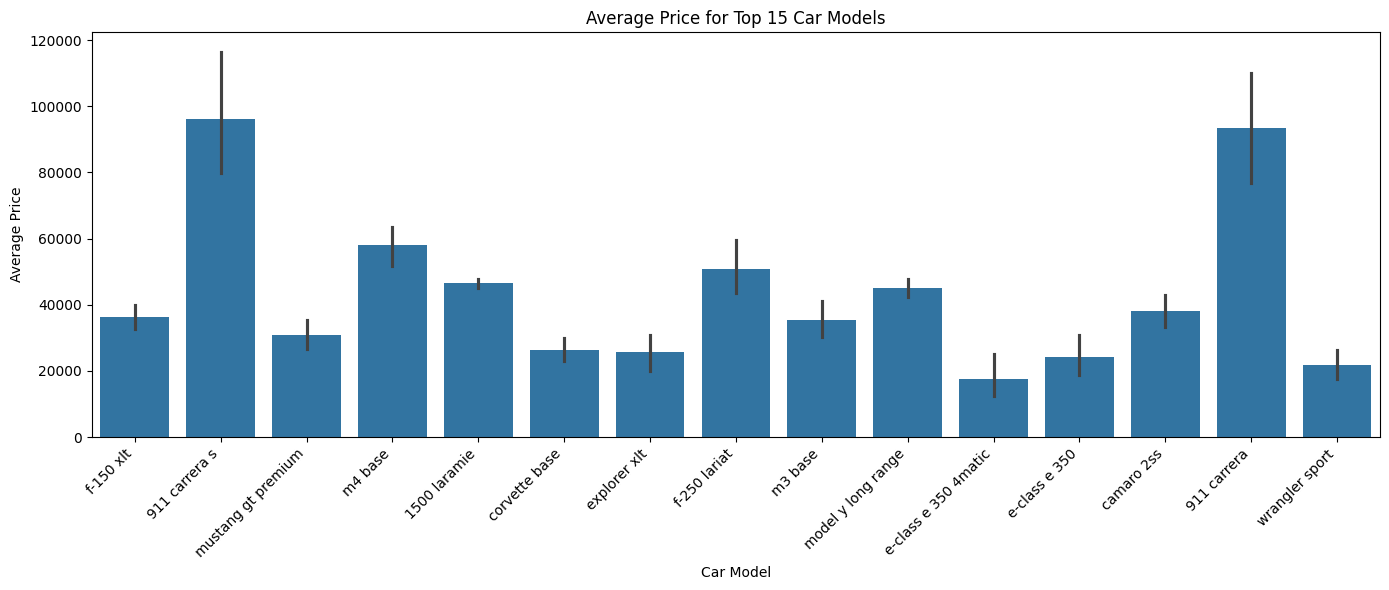

In [1494]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 15 models
top_models = df['model'].value_counts().nlargest(15).index
df['model_grouped'] = df['model'].apply(lambda x: x if x in top_models else 'Other')

# Plot average price per model
plt.figure(figsize=(14, 6))
sns.barplot(data=df[df['model_grouped'] != 'Other'], x='model_grouped', y='price')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price for Top 15 Car Models')
plt.ylabel('Average Price')
plt.xlabel('Car Model')
plt.tight_layout()
plt.show()


# **Feature Engineering**

## Handling Price Distribution Skewness

In [1495]:
df['price'].skew()


np.float64(19.51355120421606)

In [1496]:
# Applying Log Transformation to help normalize the distribution

import numpy as np

df['price_log'] = np.log1p(df['price'])  # log1p handles log(0) safely


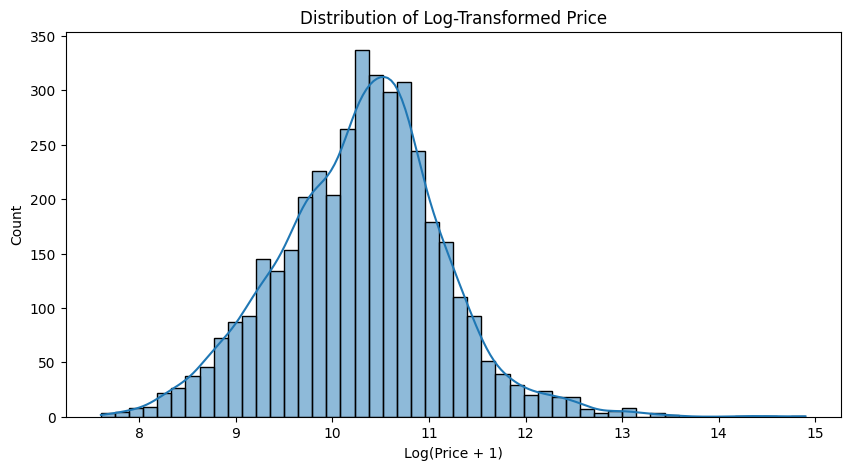

In [1497]:
# Plot the Transformed Price Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title("Distribution of Log-Transformed Price")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count")
plt.show()



The distribution is now closer to normal, which is ideal for many regression models.

This transformation should help improve model stability and performance during training

## Engine Categorization

Earlier in the EDA, the relationship between price and engine did not show a clear positive trend, likely due to inconsistencies and mixed formats in the engine column.

As part of feature engineering, we will create a new categorical feature called engine_category, which groups engine types into 7 meaningful categories. This allows us to capture mechanical relevance more effectively than relying solely on raw numerical values from the original engine column.

In [1498]:
# Assuming df is your cleaned working DataFrame

# 1. Reload original dataset
df_original = pd.read_csv("/content/used_cars.csv")

# 2. Create a temp DataFrame with only the 'engine' column
df_temp = df_original[['engine']].copy()

# 3. Define categorization function (already done)
def categorize_engine(engine):
    if pd.isnull(engine):
        return 'Unknown'
    engine = engine.lower()
    if 'electric' in engine and 'motor' in engine:
        return 'Electric'
    if 'hybrid' in engine:
        return 'Hybrid'
    if re.search(r'(v10|v12|5\.0l|5\.2l|534\.0hp|550\.0hp|715\.0hp)', engine):
        return 'High_Performance'
    if 'v8' in engine or re.search(r'8\s+cylinder', engine):
        return 'V8'
    if 'v6' in engine or re.search(r'6\s+cylinder', engine):
        return 'V6'
    if 'i4' in engine or 'inline-4' in engine or '4 cylinder' in engine or re.search(r'\b2\.\d+l|\b1\.\d+l', engine):
        return 'I4'
    return 'Other'

# 4. Apply the categorization function
df_temp['engine_category'] = df_temp['engine'].apply(categorize_engine)

# 5. Append engine_category to your main df (aligned by index)
df['engine_category'] = df_temp['engine_category']


In [1499]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,car_age,model_grouped,price_log,engine_category
0,ford,utility police interceptor base,2013,51000,e85 flex fuel,300.0,6-speed a/t,black,black,at least 1 accident or damage reported,10300,12,Other,9.239996,V6
1,hyundai,palisade sel,2021,34742,gasoline,3.8,8-speed automatic,moonlight cloud,gray,at least 1 accident or damage reported,38005,4,Other,10.545499,V6
2,lexus,rx 350 rx 350,2022,22372,gasoline,3.5,automatic,blue,black,none reported,54598,3,Other,10.907771,Other
3,infiniti,q50 hybrid sport,2015,88900,hybrid,354.0,7-speed a/t,black,black,none reported,15500,10,Other,9.648660,Hybrid
4,audi,q3 45 s line premium plus,2021,9835,gasoline,2.0,8-speed automatic,glacier white metallic,black,none reported,34999,4,Other,10.463103,I4


## Plotting Engine Category vs Price

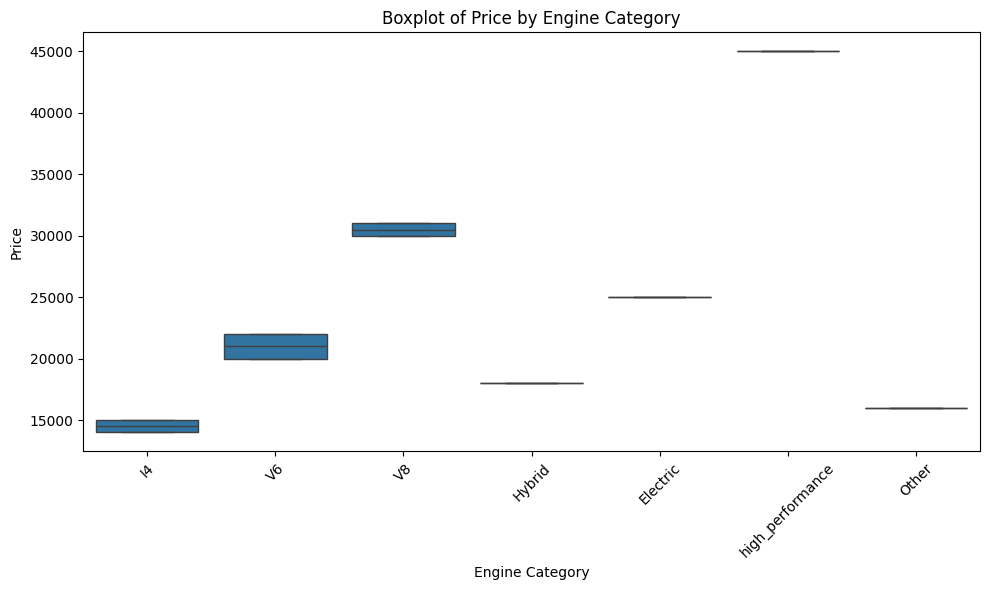

In [1500]:
df_demo = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demo, x='engine_category', y='price')
plt.title('Boxplot of Price by Engine Category')
plt.xlabel('Engine Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Trasmission Type Categorization

In the EDA we saw that there are 61 unique types of transmission type which shows hight cardinality, may cause overitting.

In feature engineering we will categorize transmission type into 5 groups

In [1501]:
# 1. Reload original dataset (if not already loaded)
df_original = pd.read_csv("/content/used_cars.csv")

# 2. Create temp DataFrame for transmission
df_trans_temp = df_original[['transmission']].copy()

# 3. Define function to categorize transmission into 5 types
def categorize_transmission(trans):
    if pd.isnull(trans):
        return 'Unknown'
    trans = trans.lower()
    if 'manual' in trans or 'm/t' in trans:
        return 'Manual'
    if 'cvt' in trans:
        return 'CVT'
    if 'dual shift' in trans or 'dual clutch' in trans:
        return 'Dual_Clutch'
    if 'a/t' in trans or 'automatic' in trans:
        return 'Automatic'
    return 'Other'

# 4. Apply the categorization function
df_trans_temp['transmission_category'] = df_trans_temp['transmission'].apply(categorize_transmission)

# 5. Append to cleaned df (align by index)
df['transmission_category'] = df_trans_temp['transmission_category']


In [1502]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,car_age,model_grouped,price_log,engine_category,transmission_category
0,ford,utility police interceptor base,2013,51000,e85 flex fuel,300.0,6-speed a/t,black,black,at least 1 accident or damage reported,10300,12,Other,9.239996,V6,Automatic
1,hyundai,palisade sel,2021,34742,gasoline,3.8,8-speed automatic,moonlight cloud,gray,at least 1 accident or damage reported,38005,4,Other,10.545499,V6,Automatic
2,lexus,rx 350 rx 350,2022,22372,gasoline,3.5,automatic,blue,black,none reported,54598,3,Other,10.907771,Other,Automatic
3,infiniti,q50 hybrid sport,2015,88900,hybrid,354.0,7-speed a/t,black,black,none reported,15500,10,Other,9.648660,Hybrid,Automatic
4,audi,q3 45 s line premium plus,2021,9835,gasoline,2.0,8-speed automatic,glacier white metallic,black,none reported,34999,4,Other,10.463103,I4,Automatic


## Plotting Transmission Category vs Price

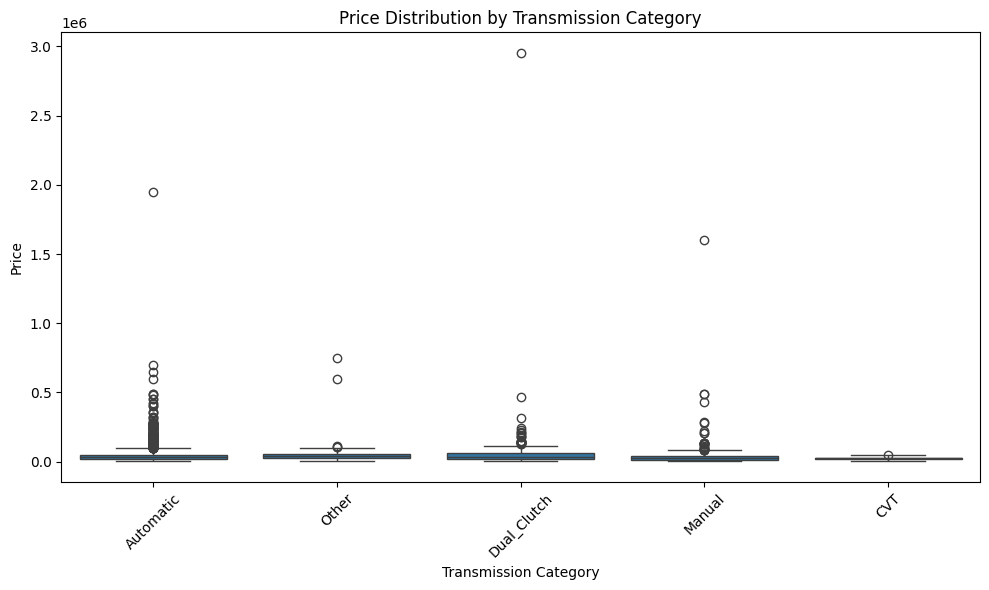

In [1503]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting transmission_category vs price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission_category', y='price')
plt.title('Price Distribution by Transmission Category')
plt.xlabel('Transmission Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretation:

The above shows clear comparison across 5 consistent categories.

Shows distribution, spread, and outliers

### **Drop Engine and Transmission Columns**


Dropping the Engine Column (numerical) as it showed no clear relationship with the target variable. It will be replaced by the engine_category


In [1504]:
df.drop(['engine','transmission'], axis=1, inplace=True)
df.head()

,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,price,car_age,model_grouped,price_log,engine_category,transmission_category
0,ford,utility police interceptor base,2013,51000,e85 flex fuel,black,black,at least 1 accident or damage reported,10300,12,Other,9.239996,V6,Automatic
1,hyundai,palisade sel,2021,34742,gasoline,moonlight cloud,gray,at least 1 accident or damage reported,38005,4,Other,10.545499,V6,Automatic
2,lexus,rx 350 rx 350,2022,22372,gasoline,blue,black,none reported,54598,3,Other,10.907771,Other,Automatic
3,infiniti,q50 hybrid sport,2015,88900,hybrid,black,black,none reported,15500,10,Other,9.648660,Hybrid,Automatic
4,audi,q3 45 s line premium plus,2021,9835,gasoline,glacier white metallic,black,none reported,34999,4,Other,10.463103,I4,Automatic


# Encoding Categorical Features

### Encoding Top 15 brands

In [1505]:
# Step 1: Get the Top 15 brands
top_brands = df['brand'].value_counts().nlargest(15).index

# Step 2: Replace less frequent brands with "other"
df['brand_encoded'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

# Step 3: One-hot encode the simplified brand column
brand_dummies = pd.get_dummies(df['brand_encoded'], prefix='brand')

# Step 4: Concatenate with original df and drop intermediate
df = pd.concat([df, brand_dummies], axis=1)
df.drop(['brand', 'brand_encoded'], axis=1, inplace=True)

# Optional: print to verify
print(brand_dummies.head())


   brand_audi  brand_bmw  brand_cadillac  brand_chevrolet  brand_ford  \
0       False      False           False            False        True   
1       False      False           False            False       False   
2       False      False           False            False       False   
3       False      False           False            False       False   
4        True      False           False            False       False   

   brand_gmc  brand_jeep  brand_land rover  brand_lexus  brand_mercedes-benz  \
0      False       False             False        False                False   
1      False       False             False        False                False   
2      False       False             False         True                False   
3      False       False             False        False                False   
4      False       False             False        False                False   

   brand_nissan  brand_other  brand_porsche  brand_ram  brand_toyota  
0        

### Encoding int_col Top 10

In [1506]:
# Step 1: Get Top 10 most frequent interior colors
top_int_colors = df['int_col'].value_counts().nlargest(10).index

# Step 2: Replace less common colors with "other"
df['int_col_encoded'] = df['int_col'].apply(lambda x: x if x in top_int_colors else 'other')

# Step 3: One-hot encode the simplified int_col
int_dummies = pd.get_dummies(df['int_col_encoded'], prefix='int_col')

# Step 4: Concatenate and drop
df = pd.concat([df, int_dummies], axis=1)
df.drop(['int_col', 'int_col_encoded'], axis=1, inplace=True)

# Optional: print to verify
print(int_dummies.head())


   int_col_beige  int_col_black  int_col_brown  int_col_ebony  int_col_gray  \
0          False           True          False          False         False   
1          False          False          False          False          True   
2          False           True          False          False         False   
3          False           True          False          False         False   
4          False           True          False          False         False   

   int_col_jet black  int_col_other  int_col_red  int_col_unknown  \
0              False          False        False            False   
1              False          False        False            False   
2              False          False        False            False   
3              False          False        False            False   
4              False          False        False            False   

   int_col_white  
0          False  
1          False  
2          False  
3          False  
4          Fals

### Encoding ext_col Top 10

In [1507]:
# Step 1: Get Top 10 most frequent exterior colors
top_ext_colors = df['ext_col'].value_counts().nlargest(10).index

# Step 2: Replace less common colors with "other"
df['ext_col_encoded'] = df['ext_col'].apply(lambda x: x if x in top_ext_colors else 'other')

# Step 3: One-hot encode the simplified ext_col
ext_dummies = pd.get_dummies(df['ext_col_encoded'], prefix='ext_col')

# Step 4: Concatenate and drop
df = pd.concat([df, ext_dummies], axis=1)
df.drop(['ext_col', 'ext_col_encoded'], axis=1, inplace=True)

# Optional: print to verify
print(ext_dummies.head())


   ext_col_beige  ext_col_black  ext_col_blue  ext_col_brown  ext_col_gold  \
0          False           True         False          False         False   
1          False          False         False          False         False   
2          False          False          True          False         False   
3          False           True         False          False         False   
4          False          False         False          False         False   

   ext_col_gray  ext_col_green  ext_col_other  ext_col_red  ext_col_silver  \
0         False          False          False        False           False   
1         False          False           True        False           False   
2         False          False          False        False           False   
3         False          False          False        False           False   
4         False          False           True        False           False   

   ext_col_white  
0          False  
1          False  
2    

### Encoding fuel_type

In [1508]:
# One-hot encode all unique values in fuel_type
fuel_dummies = pd.get_dummies(df['fuel_type'], prefix='fuel')

# Concatenate with original DataFrame
df = pd.concat([df, fuel_dummies], axis=1)

# Drop the original column
df.drop(['fuel_type'], axis=1, inplace=True)

# Optional: Inspect the result
print(fuel_dummies.head())


   fuel_diesel  fuel_e85 flex fuel  fuel_gasoline  fuel_hybrid  \
0        False                True          False        False   
1        False               False           True        False   
2        False               False           True        False   
3        False               False          False         True   
4        False               False           True        False   

   fuel_plug-in hybrid  fuel_unknown  
0                False         False  
1                False         False  
2                False         False  
3                False         False  
4                False         False  


### Encoding Transmission Category

In [1509]:
# One-hot encode the cleaned transmission categories
trans_dummies = pd.get_dummies(df['transmission_category'], prefix='trans')

# Concatenate with main DataFrame
df = pd.concat([df, trans_dummies], axis=1)

# Drop the original column
df.drop(['transmission_category'], axis=1, inplace=True)

# Optional: preview
print(trans_dummies.head())


   trans_Automatic  trans_CVT  trans_Dual_Clutch  trans_Manual  trans_Other
0             True      False              False         False        False
1             True      False              False         False        False
2             True      False              False         False        False
3             True      False              False         False        False
4             True      False              False         False        False


### Encoding Engine Category

In [1510]:
# One-hot encode engine_category
engine_dummies = pd.get_dummies(df['engine_category'], prefix='engine')

# Concatenate with the main DataFrame
df = pd.concat([df, engine_dummies], axis=1)

# Drop original column
df.drop(['engine_category'], axis=1, inplace=True)

# Optional: preview
print(engine_dummies.head())


   engine_Electric  engine_High_Performance  engine_Hybrid  engine_I4  \
0            False                    False          False      False   
1            False                    False          False      False   
2            False                    False          False      False   
3            False                    False           True      False   
4            False                    False          False       True   

   engine_Other  engine_V6  engine_V8  
0         False       True      False  
1         False       True      False  
2          True      False      False  
3         False      False      False  
4         False      False      False  


### Encoding Accident Category

In [1511]:
# One-hot encode accident
accident_dummies = pd.get_dummies(df['accident'], prefix='accident')
df = pd.concat([df, accident_dummies], axis=1)
df.drop(['accident'], axis=1, inplace=True)

print(accident_dummies.head())


   accident_at least 1 accident or damage reported  accident_none reported  \
0                                             True                   False   
1                                             True                   False   
2                                            False                    True   
3                                            False                    True   
4                                            False                    True   

   accident_unknown  
0             False  
1             False  
2             False  
3             False  
4             False  


### Encoding Top 15 Models

In [1512]:
# Step 1: Identify the top 15 most frequent models
top_15_models = df['model'].value_counts().nlargest(15).index

# Step 2: Replace less frequent models with 'Other'
df['model_cleaned'] = df['model'].apply(lambda x: x if x in top_15_models else 'Other')

# Step 3: One-hot encode the cleaned model column
model_encoded = pd.get_dummies(df['model_cleaned'], prefix='model')

# Step 4: Concatenate with main DataFrame and drop original
df = pd.concat([df, model_encoded], axis=1)
df.drop(['model', 'model_cleaned'], axis=1, inplace=True)



In [1513]:
# One-hot encode model_grouped
df_encoded = pd.get_dummies(df, columns=['model_grouped'], drop_first=True)


### **Scaling Numerica Features**

Mileage and mode year. Price was already log_transform earlier

In [1514]:
from sklearn.preprocessing import StandardScaler

# Define the numerical columns to scale
numeric_cols = ['milage', 'model_year']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Print to confirm
print(df[numeric_cols].head())


     milage  model_year
0 -0.262336   -0.412118
1 -0.573255    0.898486
2 -0.809820    1.062312
3  0.462467   -0.084467
4 -1.049579    0.898486


# **Modeling**

### Define Features (X) and Target (y)
[link text](https://)

In [1515]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


### Train-Test Split

In [1516]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression

# Model Evaluation

### Linear Regression

In [1517]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Cross-validated predictions
y_pred_cv = cross_val_predict(lr_model, X, y, cv=5)

# Metrics
r2 = r2_score(y, y_pred_cv)
mae = mean_absolute_error(y, y_pred_cv)
rmse = np.sqrt(mean_squared_error(y, y_pred_cv))

# Print
print("Linear Regression - Cross-Validated Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Linear Regression - Cross-Validated Performance:
R² Score: 0.4020
MAE: 22466.65
RMSE: 60857.28


## Ridge Regression

In [1518]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

ridge_model = Ridge(alpha=1.0)  # You can tune alpha later

# Cross-validated predictions
y_pred_ridge = cross_val_predict(ridge_model, X, y, cv=5)

# Metrics
r2_ridge = r2_score(y, y_pred_ridge)
mae_ridge = mean_absolute_error(y, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))

# Print
print("Ridge Regression - Cross-Validated Performance:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"MAE: {mae_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")


Ridge Regression - Cross-Validated Performance:
R² Score: 0.4026
MAE: 22386.17
RMSE: 60830.99


# Random Forrest

In [1519]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validated predictions
y_pred_rf = cross_val_predict(rf_model, X, y, cv=5)

# Metrics
r2_rf = r2_score(y, y_pred_rf)
mae_rf = mean_absolute_error(y, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))

# Print results
print("Random Forest Regressor - Cross-Validated Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")


Random Forest Regressor - Cross-Validated Performance:
R² Score: 0.8148
MAE: 1114.40
RMSE: 33871.84


## XGBoost

In [1520]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

xgb_model = xgb.XGBRegressor(random_state=42, verbosity=0)
y_pred_xgb = cross_val_predict(xgb_model, X, y, cv=5)

r2_xgb = r2_score(y, y_pred_xgb)
mae_xgb = mean_absolute_error(y, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y, y_pred_xgb))

print("XGBoost Regressor - Cross-Validated Performance:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")


XGBoost Regressor - Cross-Validated Performance:
R² Score: 0.8724
MAE: 1768.88
RMSE: 28110.30


## LightGBM

In [1521]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


In [1522]:
lgb_model = lgb.LGBMRegressor(random_state=42)
y_pred_lgb = cross_val_predict(lgb_model, X, y, cv=5)

r2_lgb = r2_score(y, y_pred_lgb)
mae_lgb = mean_absolute_error(y, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y, y_pred_lgb))

print("LightGBM Regressor - Cross-Validated Performance:")
print(f"R² Score: {r2_lgb:.4f}")
print(f"MAE: {mae_lgb:.2f}")
print(f"RMSE: {rmse_lgb:.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 3207, number of used features: 68
[LightGBM] [Info] Start training from score 42049.091674
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 3207, number of used features: 66
[LightGBM] [Info] Start training from score 44486.850327
[LightGBM] [Warning] Fou

# Model Evaluation Comparisson

In [1526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define results from each model
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost'],
    'R² Score': [0.8586, 0.8587, 0.9579, 0.9624],
    'MAE': [5870.32, 5869.50, 3050.11, 2824.73],
    'RMSE': [8043.29, 8042.18, 4559.91, 4288.32]
}

# Create DataFrame
results_df = pd.DataFrame(results)

results_df

,Model,R² Score,MAE,RMSE
0,Linear Regression,0.8586,5870.32,8043.29
1,Ridge Regression,0.8587,5869.50,8042.18
2,Random Forest,0.9579,3050.11,4559.91
3,XGBoost,0.9624,2824.73,4288.32


XGBoost performed the best overall: highest R² and lowest MAE and RMSE.

Random Forest is close behind and much better than linear models.

Linear and Ridge Regression are decent baselines but clearly outperformed

In [1527]:
import joblib

# Save the XGBoost model to a file
joblib.dump(xgb_model, 'best_model_xgboost.pkl')

print("Model saved as 'best_model_xgboost.pkl'")


Model saved as 'best_model_xgboost.pkl'
